# Credit Card Churner Analysis Project
## 📚 신용카드 분석 프로젝트

# 목차
#### 1. 데이터 분석 목표

#### 2. Data Description & Library

#### 3. EDA (데이터 분석)

    ▪ 3-1. 데이터셋 기본 정보 탐색
    
    ▪ 3-2. 개별 feature 탐색
    
    ▪ 3-3. 타겟 정보 확인
    

#### 4. 기준 모델 & 평가 지표 정하기

#### 5. 데이터 전처리 와 Feature Engineering

    ▪ 5-1. 데이터셋 나누기
          
    ▪ 5-2. 특정 값 제거  

    ▪ 5-3. One-Hot-Encoding
    
    ▪ 5-4. StandardScaler

#### 6. 시각화

#### 7. 머신러닝 모델 학습 및 평가

    ▪ 7-1. Logistic Regression 모델 학습 및 평가
    
    ▪ 7-2. 하이퍼파라미터를 조절한 다양한 파이프라인 만들어서 모델 학습 및 평가
  

#### 8. 최종 모델 학습 및 평가




    

## 1. 데이터 분석 목표

● 기존 고객을 유지하는 비용보다 새로운 고객을 유입시키는 비용이 훨씬 크기 기존 고객을 유지하는 것이 중요합니다. 

● 데이터 분석을 통하여 신용카드 이탈자의 특성을 분석합니다. 

● 고객 이탈에 영향을 미치는 요소를 분석하여 이탈을 미리 예측할 수 있는 모델을 만들어봅니다.

● 이탈 위험이 있는 고객들에게 적극적인 마케팅을 하여 이탈 가능성을 최대한 낮추는 것이 프로젝트의 목표입니다.


## 2. Data Description

### ▶ Feature Description


▸ CLIENTNUM : 클라이언트 번호. 계정을 보유한 고객의 고유 식별자

▸ Attrition_Flag : 고객 활동 변수 - 계정이 폐쇄된 경우 1 그렇지 않으면 0

▸ Customer_Age : 고객의 연령(년)

▸ Gender : M=남성, F=여성

▸ Dependent_count : 부양가족 수

▸ Education_Level : 학력

▸ Marital_Status : 결혼 여부

▸ Income_Category : 소득

▸ Card_Category : 카드 유형(블루, 실버, 골드, 플래티넘)

▸ Months_on_book : 은행 거래 기간

▸ Total_Relationship_Count : 고객이 보유한 제품 수

▸ Months_Inactive_12_mon : 지난 12개월 동안 비활성 개월 수

▸ Contacts_Count_12_mon : 지난 12개월 동안의 연락 수

▸ Credit_Limit : 신용 카드의 신용 한도

▸ Total_Revolving_Bal : 신용 카드의 총 회전 잔액

▸ Avg_Open_To_Buy : 신용 구매 가능 한도 (지난 12개월 평균)

▸ Total_Amt_Chng_Q4_Q1 : 거래 금액 변경(Q1 대비 Q4)

▸ Total_Trans_Amt : 총 거래 금액(지난 12개월)

▸ Total_Trans_Ct : 총 거래 건수(지난 12개월)

▸ Total_Ct_Chng_Q4_Q1 : 거래 수의 변화(Q1 대비 Q4)

▸ Avg_Utilization_Ratio : 평균 카드 이용률

### ▶ 사용할 Library

In [150]:
# 넘파이
import numpy as np

# 판다스
import pandas as pd

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 프로파일링
from pandas.plotting import scatter_matrix
from pandas_profiling import ProfileReport

# 사이킷런 - 데이터 셋 나누기
from sklearn.model_selection import train_test_split

# 사이킷런 - encoders & imputers
from category_encoders import OneHotEncoder
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer

# 사이킷런 - 스케일러
from sklearn.preprocessing import StandardScaler

# 사이킷런 - 파이프라인
from sklearn.pipeline import make_pipeline

# 사이킷런 - 학습모델
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge

# 사이킷런 - 모델 평가 지표
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

# f_regresison, SelectKBest
from sklearn.feature_selection import f_regression, SelectKBest

# model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

# 결정트리 시각화
import graphviz
from sklearn.tree import export_graphviz

# Imputer
from sklearn.impute import KNNImputer, SimpleImputer

# 다항회귀
from sklearn.preprocessing import PolynomialFeatures

# 3. EDA
### 3-1. 데이터셋 기본 정보 탐색
### ▶ 전체 데이터셋

In [151]:
# CSV파일 불러오기
df = pd.read_csv('/Users/sehwajo/Downloads/BankChurners.csv')

### ▶ 프로파일링으로 EDA

In [152]:
# 판다스 프로파일링 실행하여 간단히 EDA
#df.profile_report()

### ▶ 컬럼명 확인

In [153]:
# 컬럼명 확인

for columns in df.columns:
    print(columns)

CLIENTNUM
Attrition_Flag
Customer_Age
Gender
Dependent_count
Education_Level
Marital_Status
Income_Category
Card_Category
Months_on_book
Total_Relationship_Count
Months_Inactive_12_mon
Contacts_Count_12_mon
Credit_Limit
Total_Revolving_Bal
Avg_Open_To_Buy
Total_Amt_Chng_Q4_Q1
Total_Trans_Amt
Total_Trans_Ct
Total_Ct_Chng_Q4_Q1
Avg_Utilization_Ratio
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2


In [154]:
# 필요없는 컬럼 제거

df = df.drop(['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis = 1)

In [159]:
# 컬럼이 잘 제거되었는지 사이즈로 확인
df.shape

(10127, 20)

### ▶ 데이터타입 확인

In [160]:
# 데이터의 전반적인 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

### ▶ 결측치 확인

In [161]:
# 결측치 확인 - 결측치는 없지만 unknown 값이 있어서 처리할 필요가 있음
df.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

### ▶ 중복값 확인

In [162]:
# 데이터 중복값 확인 - 중복값 없음
df.T.duplicated()

Attrition_Flag              False
Customer_Age                False
Gender                      False
Dependent_count             False
Education_Level             False
Marital_Status              False
Income_Category             False
Card_Category               False
Months_on_book              False
Total_Relationship_Count    False
Months_Inactive_12_mon      False
Contacts_Count_12_mon       False
Credit_Limit                False
Total_Revolving_Bal         False
Avg_Open_To_Buy             False
Total_Amt_Chng_Q4_Q1        False
Total_Trans_Amt             False
Total_Trans_Ct              False
Total_Ct_Chng_Q4_Q1         False
Avg_Utilization_Ratio       False
dtype: bool

### ▶ Numeric features

In [163]:
# features - 전반적 정보. numeric features 만 보여줌
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


### ▶ Cardinality 확인

In [164]:
# 너무 많은 범주를 가지는 카테고리 특성이 있는지  카디널리티(cardinality)를 확인
# cardinality가 높으면 과적합될 가능성이 있기 때문에 cardinality 확인 후 너무 복잡하면 과감하게 Drop
# cardinality 확인은 데이터타입이 object인 것만 진행
df.describe(exclude='number').T.sort_values(by='unique')

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Marital_Status,10127,4,Married,4687
Card_Category,10127,4,Blue,9436
Income_Category,10127,6,Less than $40K,3561
Education_Level,10127,7,Graduate,3128


### 3-2. 개별 feature 탐색

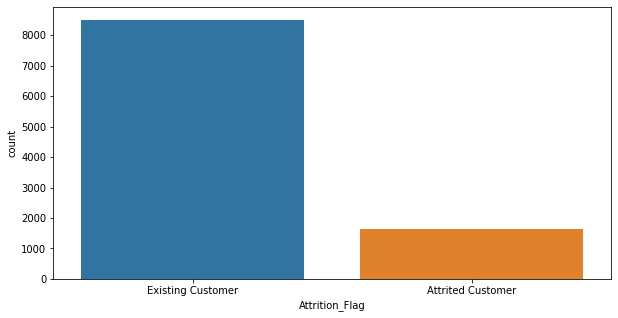

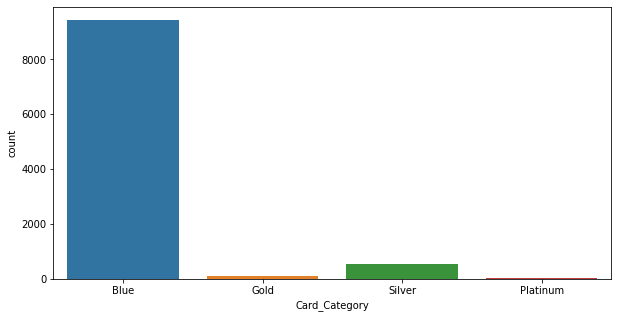

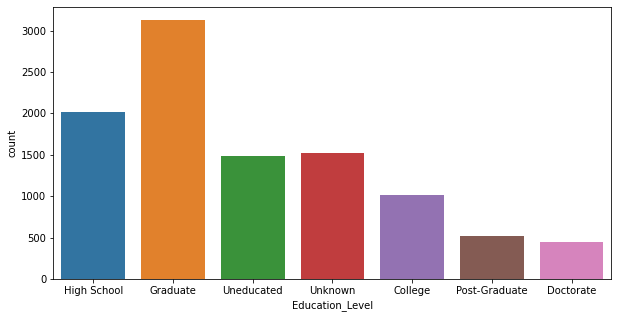

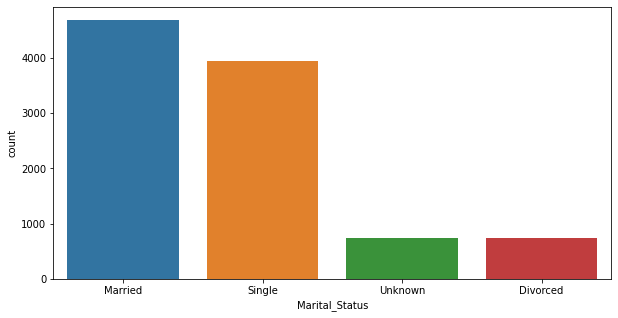

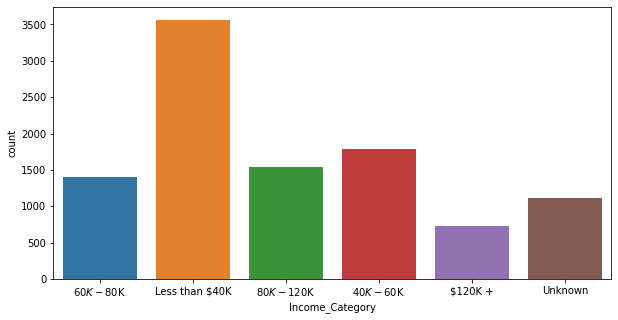

In [165]:
plt.figure(figsize = (10,5))
sns.countplot(x = df['Attrition_Flag'])
plt.show()

plt.figure(figsize = (10,5))
sns.countplot(x = df['Card_Category'])
plt.show()

plt.figure(figsize = (10,5))
sns.countplot(x= df['Education_Level'])
plt.show()

plt.figure(figsize = (10,5))
sns.countplot(x = df['Marital_Status'])
plt.show()

plt.figure(figsize = (10,5))
sns.countplot(x = df['Income_Category'])
plt.show()

### 3-3. 타켓 정보 확인

In [166]:
# 타겟 데이터 범주의 비율을 확인합니다.
df['Attrition_Flag'].value_counts(normalize=True)

Existing Customer    0.83934
Attrited Customer    0.16066
Name: Attrition_Flag, dtype: float64

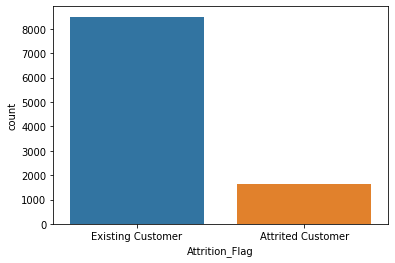

In [167]:
%matplotlib inline

target = df['Attrition_Flag']
sns.countplot(x=target);

타겟값인 Attrition_Flag데이터가 불균형한 것을 볼 수 있다.
이런 비대칭 데이터셋에서는 정확도가 높아도 재현율이 급격하게 작아지는 현상이 발생하게 된다. 
100개의 데이터 중 3개가 부실이면 모두 정상이라고 예측해도 정확도가 97%가 나오기 때문이다.
이런 데이터 불균형을 처리하는 방법에는 여러가지가 있는데 그 중 '업샘플링'을 사용할 것이다.
업샘플링은 기준을 정해서 무작위로 소수 데이터를 복제한다. 정보가 손실되지 않는다는 장점이 있으나, 오버피팅을 초래하여 trainset의 성능은 높지만 testset의 성능은 나빠질 수 있다.

# 4. 기존 모델 & 평가 지표 정하기
### ▶ 기준 모델 정하기 

In [168]:
# mode(): Return the highest frequency value in a Series.
major = y_train.mode()[0]

# 타겟 샘플 수 만큼 0이 담긴 리스트를 만듭니다. 기준모델로 예측
y_pred = [major] * len(y_train)

# 최다 클래스의 빈도가 정확도가 됩니다.
# 훈련세트에서 정확도 확인
print("training accuracy: ", accuracy_score(y_train, y_pred))

# 검증세트 에서도 정확도를 확인
y_pred = [major] * len(y_val)
print("validation accuracy: ", accuracy_score(y_val, y_pred))

training accuracy:  0.8379629629629629
validation accuracy:  0.8365206662553979


### ▶ 평가 지표 정하기

- 정밀도(Precision)는 Positive로 예측한 경우 중 올바르게 Positive를 맞춘 비율입니다: $\large \frac{TP}{TP + FP}$

    양성으로 예측된 것(TP+FP) 중 얼마나 많은 샘플이 진짜 양성(TP)인지 측정
    거짓 양성의 수를 줄이는 것이 목표일 때 사용(ex. 비싼 신약의 효과를 단 한 번의 실험으로 검증하기를 원할 때)


- 재현율(Recall, Sensitivity)은 실제 Positive인 것 중 올바르게 Positive를 맞춘 것의 비율 입니다: $\large \frac{TP}{TP + FN}$

    전체 양성 샘플 중 얼마나 많은 샘플이 양성 클래스로 분류되는지 측정. 거짓 음성을 피하는 것이 중요할 때, 즉 모든 양성     샘플을 식별해야 할 때 사용
    (ex. 건강한 사람이 일부 포함되더라도 암에 걸린 사람을 빠짐없이 찾는 것이 중요)
    

- F1점수(F1 score)는 정밀도와 재현율의 조화평균(harmonic mean)입니다: $ 2\cdot\large\frac{precision\cdot recall}{precision + recall}$




# 5. 데이터 전처리 와 feature engineering
### 5-1. 데이터셋 나누기

In [169]:
# 훈련용과 테스트 용으로 데이터세트 나누기
train, test = train_test_split(df,test_size=0.2, random_state=2)

# 훈련용 데이터를 다시 나누기 : 훈련용(80%), 검증용(20%)
train, val = train_test_split(train, test_size=0.2, random_state=2)

# 타겟은 Attrition_Flag
# 'Attrition_Flag' 컬럼에서 Existing Customer는 이탈하지 않은 고객, Attrited Customer는 이탈한 고객
# 훈련, 검증, 테스트 데이터 세트를 타겟과 나머지 데이터로 나누기

X_train = train.drop(['Attrition_Flag'], axis= 1)
y_train = train.Attrition_Flag

X_val = val.drop(['Attrition_Flag'], axis= 1)
y_val = val.Attrition_Flag

X_test = test.drop(['Attrition_Flag'], axis= 1)
y_test = test.Attrition_Flag

# 확인
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_val.shape, y_val.shape

((6480, 19), (6480,), (1621, 19), (1621,), (1621, 19), (1621,))

### 5-2. 특정 값 제거

In [170]:
# Education_Level이 Unknown인 값 제거하기
df = df[df.Education_Level != 'Unknown']

# Marital_Status가 Unknown인 값 제거하기
df = df[df.Marital_Status != 'Unknown']

# Income_Category가 Unknown인 값 제거하기
df = df[df.Income_Category != 'Unknown']

# Unknown 값이 전부 잘 제거되었는지 확인
print(df['Education_Level'].unique())
print(df['Marital_Status'].unique())
print(df['Income_Category'].unique())

['High School' 'Graduate' 'Uneducated' 'College' 'Post-Graduate'
 'Doctorate']
['Married' 'Single' 'Divorced']
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +']


### 5-3. 카테고리 데이터 처리를 위해 원핫인코딩을 수행
원핫인코딩을 수행하여 카테고리형 데이터를 수치형 데이터로 변경해줍니다.

주의할 점 : 카테고리가 너무 많은 경우(high cardinality)에는 사용하기 적합하지 않다.

In [171]:
encoder = OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
X_test_encoded = encoder.transform(X_test)
X_train_encoded.head(3)

/opt/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,Customer_Age,Gender_M,Gender_F,Dependent_count,Education_Level_Post-Graduate,Education_Level_College,Education_Level_Graduate,Education_Level_Uneducated,Education_Level_Unknown,Education_Level_High School,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
9047,50,1,0,1,1,0,0,0,0,0,...,3,2,34516.0,0,34516.0,1.032,5547,75,0.744,0.000
137,45,1,0,4,0,1,0,0,0,0,...,1,0,10408.0,1186,9222.0,1.689,2560,42,1.211,0.114
3538,46,1,0,3,0,0,1,0,0,0,...,1,2,8101.0,1266,6835.0,0.615,3226,53,0.710,0.156


### 5-4. StandardScaler
특성들의 척도를 맞추기 위해 표준정규분포로 표준화하는(평균=0, 표준편차=1) StandardScaler

In [172]:
# 특성값들을 표준화 합니다
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [173]:
X_train_scaled

array([[ 0.45794453,  1.05587997, -1.05587997, ...,  0.44019815,
         0.12279548, -0.99419249],
       [-0.15914925,  1.05587997, -1.05587997, ..., -0.96633115,
         2.0402693 , -0.58016164],
       [-0.03573049,  1.05587997, -1.05587997, ..., -0.49748805,
        -0.01680647, -0.42762395],
       ...,
       [-0.89966178,  1.05587997, -1.05587997, ..., -0.24175545,
        -0.30832819, -0.80170446],
       [-0.282568  ,  1.05587997, -1.05587997, ...,  0.90904125,
         0.02425292, -0.82712741],
       [ 0.70478204, -0.94707735,  0.94707735, ...,  1.03690755,
         0.73868642,  1.13043954]])

In [174]:
# 평균은 0, 표준편차는 1로 표준화 되었습니다.
X_train_scaled.T[0].mean(), X_train_scaled.T[0].std()

(-3.5856091758264317e-16, 1.0)

# 6. 시각화

### ▶ 산점도 확인

/opt/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


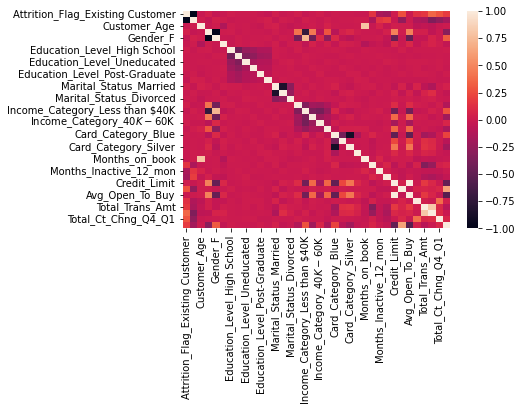

In [175]:
# 원래 데이터 상관관계분석을 확인하기 위해 원핫인코딩 작업
encoder = OneHotEncoder(use_cat_names=True)
df_encoded = encoder.fit_transform(df)


sns.heatmap(df_encoded.corr())
plt.rcParams['figure.figsize'] = [20,20]

### ▶ 상관계수 확인

In [176]:
df_encoded.corr(method='pearson')

,Attrition_Flag_Existing Customer,Attrition_Flag_Attrited Customer,Customer_Age,Gender_M,Gender_F,Dependent_count,Education_Level_High School,Education_Level_Graduate,Education_Level_Uneducated,Education_Level_College,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Attrition_Flag_Existing Customer,1.000000,-1.000000,-0.008735,0.035358,-0.035358,-0.011423,0.020932,0.001012,0.003353,0.000791,...,-0.152732,-0.193923,0.015815,0.265380,-0.007802,0.132702,0.160378,0.357261,0.280460,0.183984
Attrition_Flag_Attrited Customer,-1.000000,1.000000,0.008735,-0.035358,0.035358,0.011423,-0.020932,-0.001012,-0.003353,-0.000791,...,0.152732,0.193923,-0.015815,-0.265380,0.007802,-0.132702,-0.160378,-0.357261,-0.280460,-0.183984
Customer_Age,-0.008735,0.008735,1.000000,-0.010569,0.010569,-0.128232,0.008855,-0.003787,0.004179,-0.011245,...,0.057870,-0.023971,0.024563,0.016325,0.023097,-0.068976,-0.045859,-0.069883,-0.017599,0.001296
Gender_M,0.035358,-0.035358,-0.010569,1.000000,-1.000000,0.008121,0.019963,-0.011187,0.000647,-0.000634,...,-0.011282,0.045244,0.476471,0.020816,0.474351,0.034839,0.034648,-0.055468,-0.007336,-0.309002
Gender_F,-0.035358,0.035358,0.010569,-1.000000,1.000000,-0.008121,-0.019963,0.011187,-0.000647,0.000634,...,0.011282,-0.045244,-0.476471,-0.020816,-0.474351,-0.034839,-0.034648,0.055468,0.007336,0.309002
Dependent_count,-0.011423,0.011423,-0.128232,0.008121,-0.008121,1.000000,-0.017678,0.008795,-0.002829,0.013462,...,-0.022804,-0.055625,0.081379,-0.003832,0.081674,-0.033320,0.023236,0.057056,0.019081,-0.042485
Education_Level_High School,0.020932,-0.020932,0.008855,0.019963,-0.019963,-0.017678,1.000000,-0.419206,-0.249777,-0.203002,...,-0.006485,-0.000065,-0.008820,0.028286,-0.011331,0.000154,0.003117,0.000898,0.000407,0.013911
Education_Level_Graduate,0.001012,-0.001012,-0.003787,-0.011187,0.011187,0.008795,-0.419206,1.000000,-0.343832,-0.279443,...,0.010697,0.001726,-0.001607,-0.011963,-0.000541,-0.012657,-0.000157,-0.004422,0.000382,-0.002013
Education_Level_Uneducated,0.003353,-0.003353,0.004179,0.000647,-0.000647,-0.002829,-0.249777,-0.343832,1.000000,-0.166502,...,-0.002833,0.026824,0.014856,-0.000682,0.014908,0.008064,0.009537,0.007516,0.015138,-0.004793
Education_Level_College,0.000791,-0.000791,-0.011245,-0.000634,0.000634,0.013462,-0.203002,-0.279443,-0.166502,1.000000,...,0.000806,-0.019551,0.005530,-0.011015,0.006507,0.012083,-0.013940,-0.000600,0.008889,-0.009862


<AxesSubplot:>

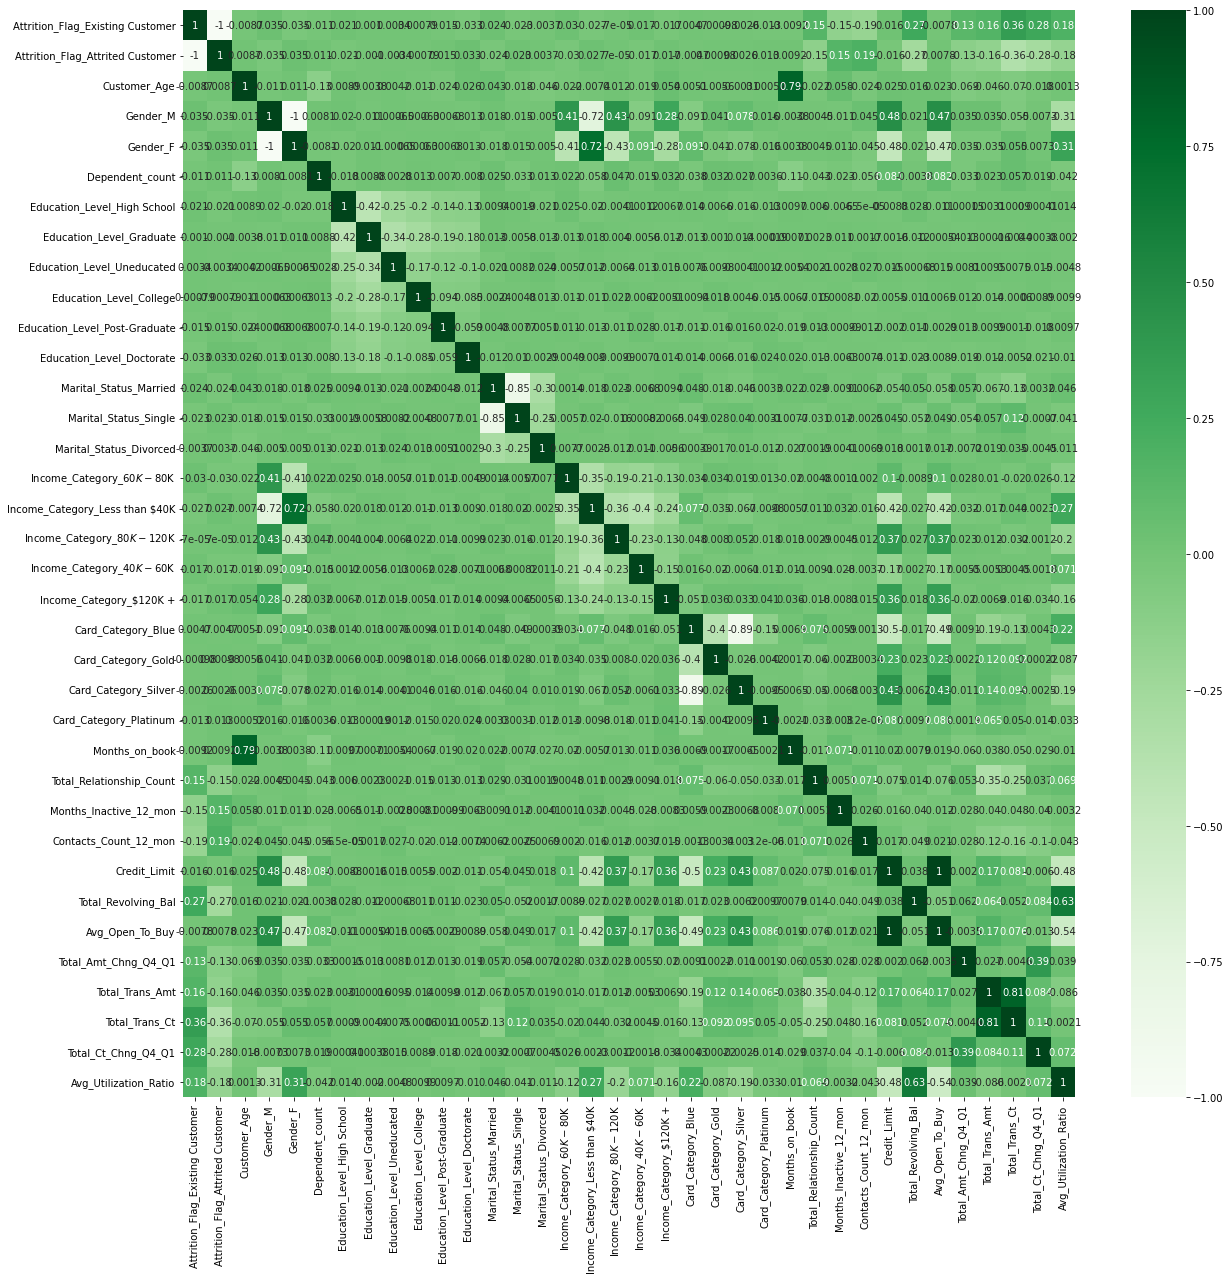

In [177]:
#heatmap으로 상관관계를 표시
import seaborn as sb
plt.rcParams["figure.figsize"] = (20,20)
sb.heatmap(df_encoded.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )

In [178]:
# 이탈한 고객과 상관계수가 높은 컬럼 순으로 보기

df_encoded.corr()['Attrition_Flag_Attrited Customer'].sort_values(ascending=False)

Attrition_Flag_Attrited Customer    1.000000
Contacts_Count_12_mon               0.193923
Months_Inactive_12_mon              0.152732
Gender_F                            0.035358
Education_Level_Doctorate           0.033169
Income_Category_Less than $40K      0.027114
Marital_Status_Single               0.022535
Income_Category_$120K +             0.017218
Education_Level_Post-Graduate       0.015019
Card_Category_Platinum              0.012522
Dependent_count                     0.011423
Months_on_book                      0.009249
Customer_Age                        0.008735
Avg_Open_To_Buy                     0.007802
Marital_Status_Divorced             0.003659
Card_Category_Silver                0.002620
Card_Category_Gold                  0.000979
Income_Category_$80K - $120K        0.000070
Education_Level_College            -0.000791
Education_Level_Graduate           -0.001012
Education_Level_Uneducated         -0.003353
Card_Category_Blue                 -0.004743
Credit_Lim

In [179]:
boolearn_attrited_customer = df['Attrition_Flag'] == 'Attrited Customer'
new_df = df[boolearn_attrited_customer]

In [180]:
# Attrited Customer인 인덱스만 추출하여 시각화

Married     0.503319
Single      0.416325
Divorced    0.080356
Name: Marital_Status, dtype: float64

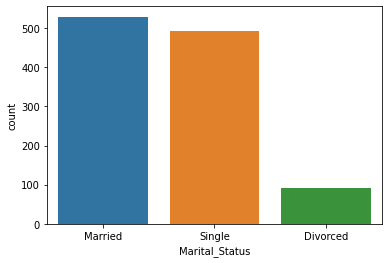

In [181]:
%matplotlib inline
df_marital = new_df['Marital_Status']
sns.countplot(x= df_marital);
df['Marital_Status'].value_counts(normalize=True)

Graduate         0.365909
High School      0.233442
Uneducated       0.170032
College          0.119192
Post-Graduate    0.060867
Doctorate        0.050558
Name: Education_Level, dtype: float64

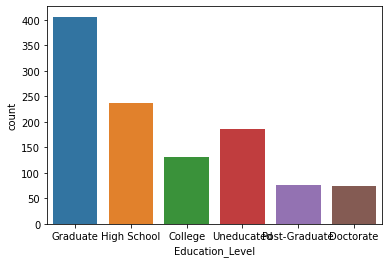

In [182]:
%matplotlib inline
df_Education_Level = new_df['Education_Level']
sns.countplot(x= df_Education_Level);
df['Education_Level'].value_counts(normalize=True)

Less than $40K    0.394295
$40K - $60K       0.199407
$80K - $120K      0.169750
$60K - $80K       0.155769
$120K +           0.080780
Name: Income_Category, dtype: float64

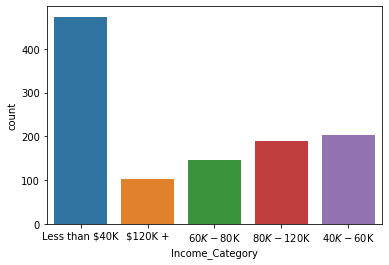

In [183]:
%matplotlib inline
df_Income_Category = new_df['Income_Category']
sns.countplot(x= df_Income_Category);
df['Income_Category'].value_counts(normalize=True)

3    0.332439
2    0.320717
1    0.145318
4    0.138116
0    0.040672
5    0.018500
6    0.004237
Name: Contacts_Count_12_mon, dtype: float64

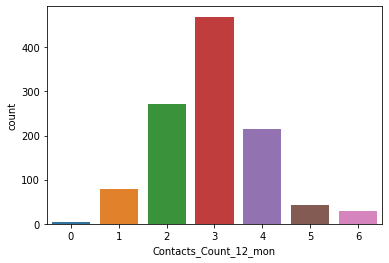

In [184]:
%matplotlib inline
df_Contacts_Count_12_mon = new_df['Contacts_Count_12_mon']
sns.countplot(x= df_Contacts_Count_12_mon);
df['Contacts_Count_12_mon'].value_counts(normalize=True)

3    0.384691
2    0.327637
1    0.215365
4    0.040813
5    0.018218
6    0.010592
0    0.002683
Name: Months_Inactive_12_mon, dtype: float64

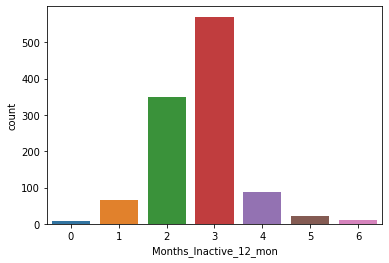

In [185]:
%matplotlib inline
df_Months_Inactive_12_mon = new_df['Months_Inactive_12_mon']
sns.countplot(x= df_Months_Inactive_12_mon);
df['Months_Inactive_12_mon'].value_counts(normalize=True)

# 7. 머신러닝 모델 학습 및 평가
### 7-1. Logistic Regression 모델 학습 및 평가

In [186]:
# 로지스틱리그레션 모델 만들기
# 타겟이 'Existing Customer'과 'Attrited Customer'로 나뉘는 분류문제이므로 0과 1사이의 값으로 결과를 내는 로지스틱 회귀(Logistic Regression)를 사용 )


model = LogisticRegression(random_state=1)
model.fit(X_train_scaled, y_train)


LogisticRegression(random_state=1)

In [187]:
y_pred = model.predict(X_val_scaled)
accuracy_score(y_val, y_pred)

0.904380012338063

In [188]:
coefficients = pd.Series(model.coef_[0], X_train_encoded.columns)
coefficients.sort_values(ascending=True)

Total_Trans_Amt                  -1.546824
Contacts_Count_12_mon            -0.529321
Months_Inactive_12_mon           -0.508594
Gender_F                         -0.229781
Dependent_count                  -0.177283
Income_Category_$120K +          -0.171775
Marital_Status_Single            -0.138782
Card_Category_Gold               -0.111789
Income_Category_$80K - $120K     -0.101278
Education_Level_Doctorate        -0.098613
Marital_Status_Unknown           -0.059339
Card_Category_Silver             -0.053082
Card_Category_Platinum           -0.052117
Income_Category_$60K - $80K      -0.036114
Education_Level_Post-Graduate    -0.030856
Marital_Status_Divorced          -0.017196
Education_Level_Uneducated       -0.012132
Months_on_book                   -0.007089
Education_Level_Unknown           0.003246
Education_Level_High School       0.017255
Education_Level_Graduate          0.030709
Education_Level_College           0.031391
Income_Category_Less than $40K    0.045069
Income_Cate

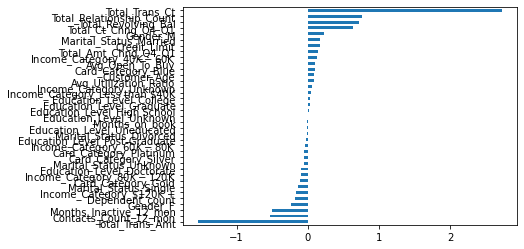

In [189]:
coefficients.sort_values().plot.barh().ascending=True;

### 7-2. 다양한 파이프라인 만들어서 모델 학습 및 평가

In [137]:
# pipe1 : 결정트리
# 복잡한 트리는 과적합 가능성을 높이기 때문에 복잡도를 낮추어 일반화를 유도합니다

# 트리의 복잡도를 줄이기 위해 사용하는 하이퍼파라미터들
# min_samples_split
# min_samples_leaf
# max_depth


pipe1 = make_pipeline(
    DecisionTreeClassifier(max_depth=6, min_samples_leaf=10, random_state=2) 
)


# 파이프라인 학습
pipe1.fit(X_train_scaled, y_train)

pred_pipe1 = pipe1.predict(X_val_scaled)


print('pipe1 훈련 정확도 점수:', pipe1.score(X_train_scaled, y_train))
print('pipe1 검증 정확도 점수:', pipe1.score(X_val_scaled, y_val))
print('\n')


print('pipe1 정확도 점수: ', accuracy_score(y_val, pred_pipe1))
print('\n')

confusion_pipe1 = confusion_matrix(y_val, pred_pipe1)
print("오차행렬:\n", confusion_pipe1)
print('\n')

print("~ pipe1 학습 결과 평가 지표 ~\n\n")
print(classification_report(y_val, pred_pipe1))

pipe1 훈련 정확도 점수: 0.9550925925925926
pipe1 검증 정확도 점수: 0.9413942011104257


pipe1 정확도 점수:  0.9413942011104257


오차행렬:
 [[ 204   61]
 [  34 1322]]


~ pipe1 학습 결과 평가 지표 ~


                   precision    recall  f1-score   support

Attrited Customer       0.86      0.77      0.81       265
Existing Customer       0.96      0.97      0.97      1356

         accuracy                           0.94      1621
        macro avg       0.91      0.87      0.89      1621
     weighted avg       0.94      0.94      0.94      1621



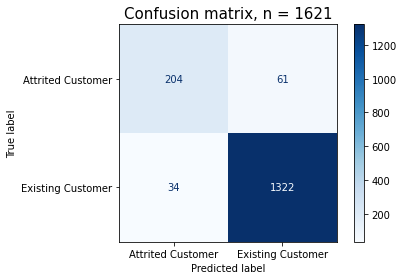

In [138]:
fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe1, X_val_scaled, y_val,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)
plt.show()

In [139]:
# pipe2 : 로지스틱회귀

pipe2 = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=1)#(solver='saga', max_iter=2000)
)


# 파이프라인 학습
pipe2.fit(X_train_scaled, y_train)

pred_pipe2 = pipe2.predict(X_val_scaled)



print('pipe2 훈련 정확도 점수:', pipe2.score(X_train_scaled, y_train))
print('pipe2 검증 정확도 점수:', pipe2.score(X_val_scaled, y_val))
print('\n')



print('pipe2 정확도 점수: ', accuracy_score(y_val, pred_pipe2))
print('\n')

confusion_pipe1 = confusion_matrix(y_val, pred_pipe2)
print("오차행렬:\n", confusion_pipe1)
print('\n')

print("~ pipe2 학습 결과 평가 지표 ~\n\n")
print(classification_report(y_val, pred_pipe2))

pipe2 훈련 정확도 점수: 0.9061728395061729
pipe2 검증 정확도 점수: 0.904380012338063


pipe2 정확도 점수:  0.904380012338063


오차행렬:
 [[ 151  114]
 [  41 1315]]


~ pipe2 학습 결과 평가 지표 ~


                   precision    recall  f1-score   support

Attrited Customer       0.79      0.57      0.66       265
Existing Customer       0.92      0.97      0.94      1356

         accuracy                           0.90      1621
        macro avg       0.85      0.77      0.80      1621
     weighted avg       0.90      0.90      0.90      1621



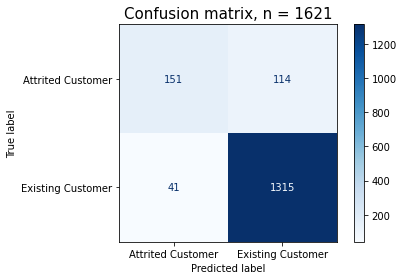

In [140]:
fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe2, X_val_scaled, y_val,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)
plt.show()

In [141]:
# pipe3 : 랜덤포레스트

pipe3 = make_pipeline(
#     OrdinalEncoder(),
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(), 
    RandomForestClassifier(random_state=10, n_jobs=-1, oob_score=True)
)




# 파이프라인 학습
pipe3.fit(X_train_scaled, y_train)

pred_pipe3 = pipe3.predict(X_val_scaled)




print('pipe3 훈련 정확도 점수:', pipe3.score(X_train_scaled, y_train))
print('pipe3 검증 정확도 점수:', pipe3.score(X_val_scaled, y_val))
print('\n')
print('pipe3 정확도 점수: ', accuracy_score(y_val, pred_pipe3))


print('\n')

confusion_pipe3 = confusion_matrix(y_val, pred_pipe3)
print("오차행렬:\n", confusion_pipe3)
print('\n')

print("~ pipe3 학습 결과 평가 지표 ~\n\n")
print(classification_report(y_val, pred_pipe3))

/opt/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


pipe3 훈련 정확도 점수: 1.0
pipe3 검증 정확도 점수: 0.958667489204195


pipe3 정확도 점수:  0.958667489204195


오차행렬:
 [[ 211   54]
 [  13 1343]]


~ pipe3 학습 결과 평가 지표 ~


                   precision    recall  f1-score   support

Attrited Customer       0.94      0.80      0.86       265
Existing Customer       0.96      0.99      0.98      1356

         accuracy                           0.96      1621
        macro avg       0.95      0.89      0.92      1621
     weighted avg       0.96      0.96      0.96      1621



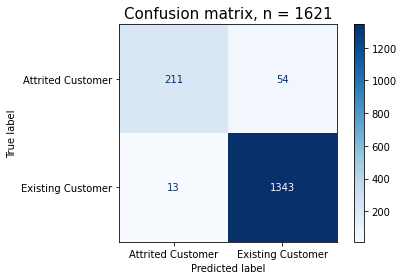

In [142]:
fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe3, X_val_scaled, y_val,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)
plt.show()

In [143]:
# pipe4 : 결정트리(pipe1)모델의 파라미터값 조절해보기

pipe4 = make_pipeline(
    DecisionTreeClassifier(max_depth=6, min_samples_leaf=3, random_state=2) # min_samples_leaf=5 경우 훈련, 검증정확도는 좋지만 MAE값은 더 커짐. 
)

# 파이프라인 학습
pipe4.fit(X_train_scaled, y_train)

pred_pipe4 = pipe4.predict(X_val_scaled)



print('pipe4 훈련 정확도 점수:', pipe4.score(X_train_scaled, y_train))
print('pipe4 검증 정확도 점수:', pipe4.score(X_val_scaled, y_val))
print('\n')



print('pipe4 정확도 점수: ', accuracy_score(y_val, pred_pipe4))
print('\n')

confusion_pipe4 = confusion_matrix(y_val, pred_pipe4)
print("오차행렬:\n", confusion_pipe4)
print('\n')

print("~ pipe4 학습 결과 평가 지표 ~\n\n")
print(classification_report(y_val, pred_pipe4))

pipe4 훈련 정확도 점수: 0.9604938271604938
pipe4 검증 정확도 점수: 0.9475632325724861


pipe4 정확도 점수:  0.9475632325724861


오차행렬:
 [[ 210   55]
 [  30 1326]]


~ pipe4 학습 결과 평가 지표 ~


                   precision    recall  f1-score   support

Attrited Customer       0.88      0.79      0.83       265
Existing Customer       0.96      0.98      0.97      1356

         accuracy                           0.95      1621
        macro avg       0.92      0.89      0.90      1621
     weighted avg       0.95      0.95      0.95      1621



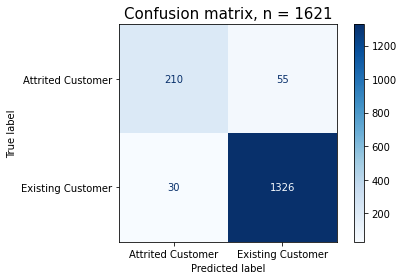

In [144]:
fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe4, X_val_scaled, y_val,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)
plt.show()

# 8. 최종 모델 학습 및 평가
▶ 테스트 데이터 세트로 모델 성능 확인해보기


In [145]:
# 최종모델은 랜덤포레스트를 이용한 머신러닝 모델 사용

# 파이프라인 학습
pipe1.fit(X_test_scaled, y_test)

pred_test = pipe1.predict(X_test_scaled)

print('<최종 모델 테스트 평가>\n')

print('final 정확도 점수: ', accuracy_score(y_test, pred_test))
print('\n')

confusion_final = confusion_matrix(y_test, pred_test)
print("오차행렬:\n", confusion_final)
print('\n')

print("~ final 학습 결과 평가 지표 ~\n\n")
print(classification_report(y_test, pred_test))





<최종 모델 테스트 평가>

final 정확도 점수:  0.93928923988154


오차행렬:
 [[ 276   36]
 [  87 1627]]


~ final 학습 결과 평가 지표 ~


                   precision    recall  f1-score   support

Attrited Customer       0.76      0.88      0.82       312
Existing Customer       0.98      0.95      0.96      1714

         accuracy                           0.94      2026
        macro avg       0.87      0.92      0.89      2026
     weighted avg       0.94      0.94      0.94      2026



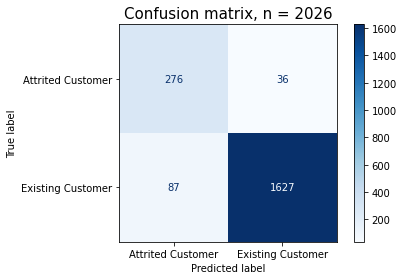

In [146]:
fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe1, X_test_scaled, y_test,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_test)}', fontsize=15)
plt.show()